### Mounting to connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Installing required libraries

In [ ]:
!pip install networkx

### Creating the Knowledge Graph

In [ ]:
import pandas as pd
import networkx as nx

# Load the nodes and edges data
nodes_df = pd.read_csv('/content/drive/My Drive/ERP/Dataset/nodes_191120.csv')# Adjust the path as needed , this is the path to my personal Google Drive
edges_df = pd.read_csv('/content/drive/My Drive/ERP/Dataset/edges_191120.csv')# Adjust the path as needed , this is the path to my personal Google Drive

# Create a mapping from node_id to node properties
node_id_to_properties = {
    row['node_id']: {
        'name': row['name'],
        'node_type': row['node_type'],
        'is_hub': row['is_hub']
    } for _, row in nodes_df.iterrows()
}

# Initialize an empty graph
G = nx.Graph()

# Add nodes to the graph with name as the identifier and other properties
for node_id, properties in node_id_to_properties.items():
    G.add_node(properties['name'], node_type=properties['node_type'], is_hub=properties['is_hub'])

# Add edges to the graph
for _, row in edges_df.iterrows():
    node1 = node_id_to_properties[row['id_1']]['name']
    node2 = node_id_to_properties[row['id_2']]['name']
    score = row['score']
    edge_type = row['edge_type']
    G.add_edge(node1, node2, score=score, edge_type=edge_type)


### Visualising the graph

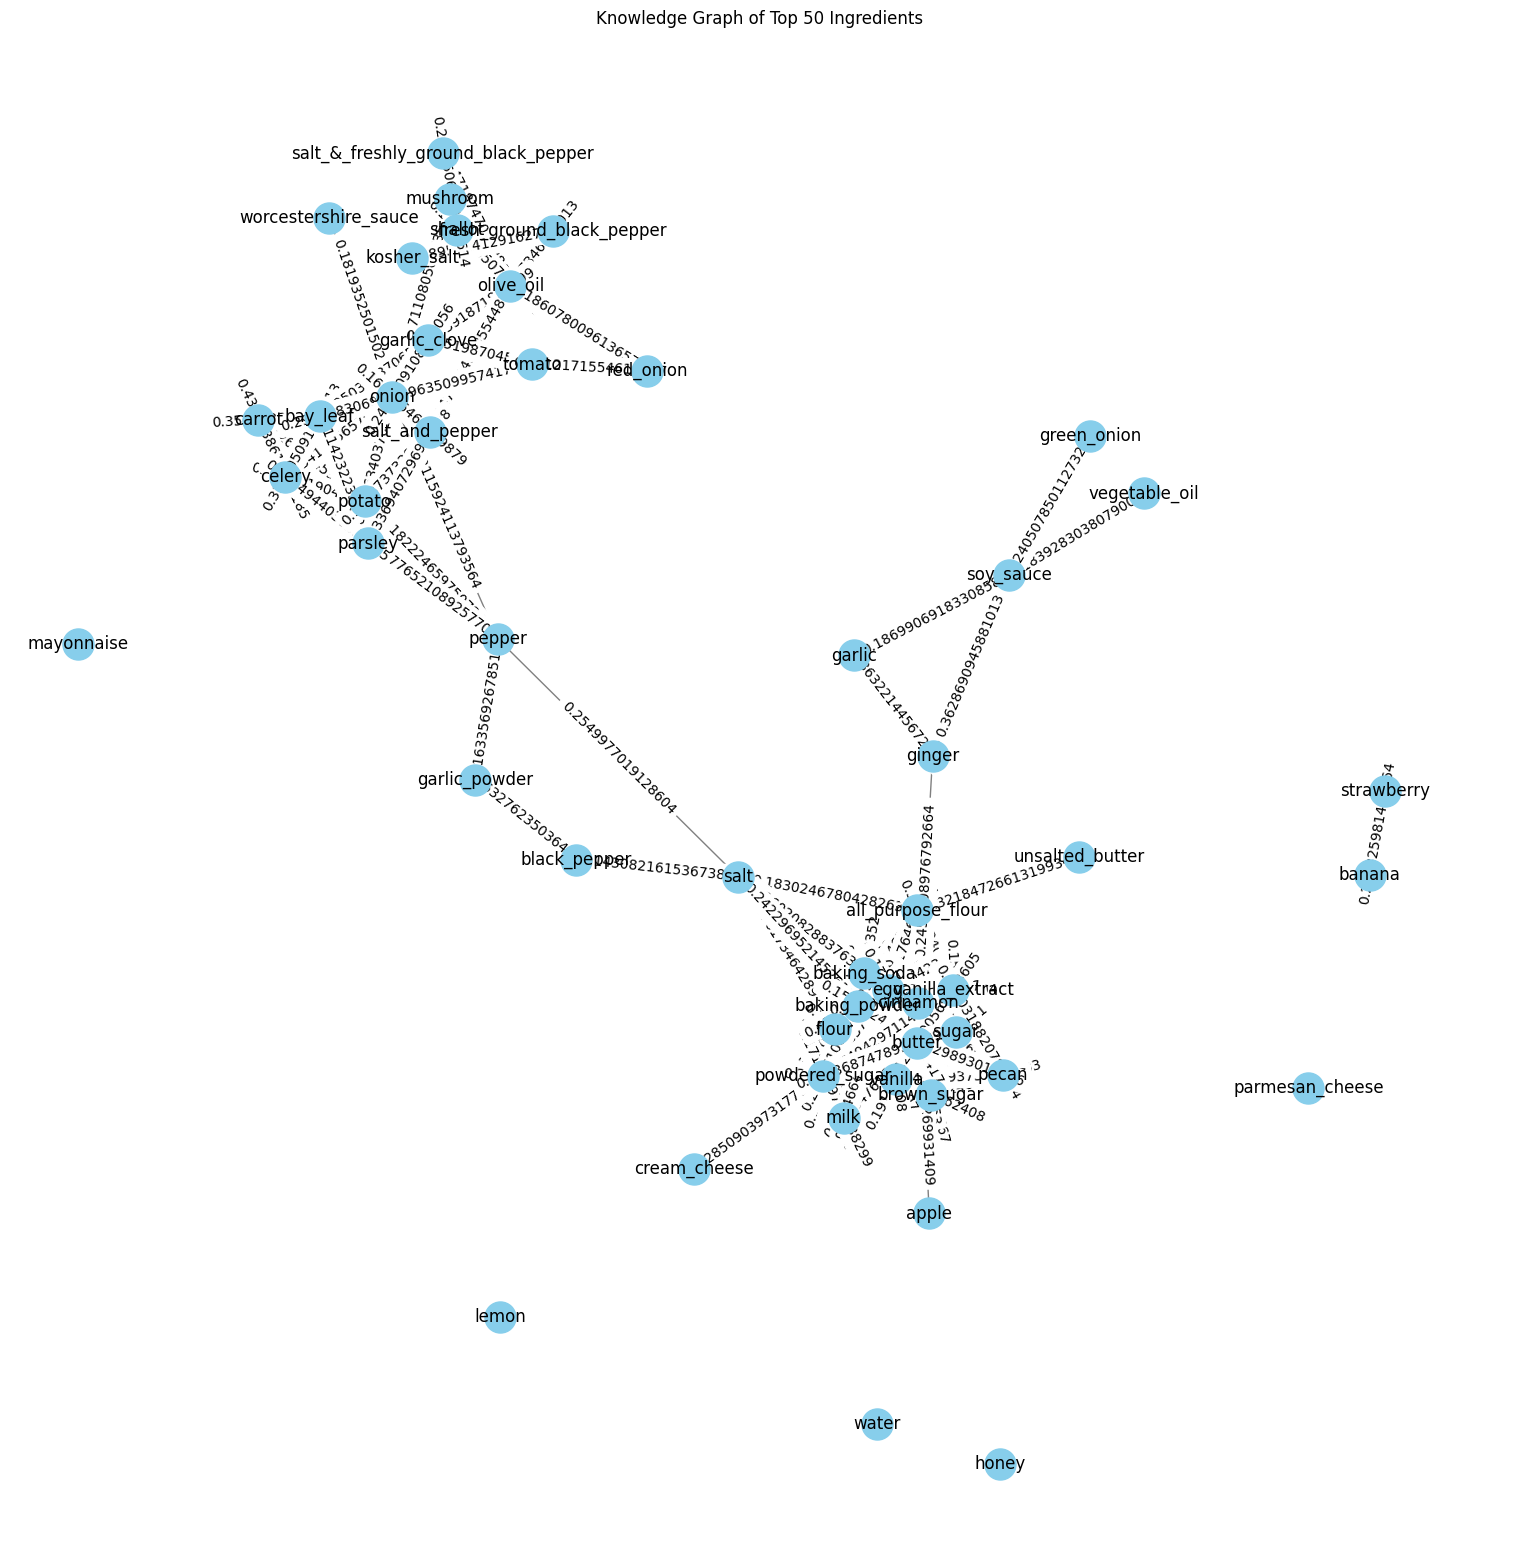

In [ ]:
import matplotlib.pyplot as plt
# Select top 50 ingredients based on degree (number of connections)
top_50_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:50]
top_50_node_ids = [node[0] for node in top_50_nodes]

# Create a subgraph with these top 50 nodes
subgraph = G.subgraph(top_50_node_ids)

# Draw the subgraph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(subgraph, k=0.3)  # Adjust the k parameter for better spacing
nx.draw(subgraph, pos, with_labels=True, node_size=500, font_size=12, node_color='skyblue', edge_color='gray')
edge_labels = nx.get_edge_attributes(subgraph, 'score')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels)
plt.title('Knowledge Graph of Top 50 Ingredients')
plt.show()

### Checking properties

In [ ]:
# Function to print properties of a specific node
def print_node_properties(node_id):
    if node_id in G.nodes:
        print(f"Properties of node {node_id}:")
        print(G.nodes[node_id])
    else:
        print(f"Node {node_id} does not exist in the graph.")

# Example usage
node_id_to_check = 'sugar'  # Replace with the actual ingredient you want to check
print_node_properties(node_id_to_check)

Properties of node sugar:
{'node_type': 'ingredient', 'is_hub': 'hub'}


### Saving the Knowledge Graph

In [ ]:
# Save the graph to a GraphML file
nx.write_graphml(G, '/content/drive/My Drive/ERP/knowledge_graph.graphml') # Adjust the path as needed , this is the path to my personal Google Drive